In [1]:
from scipy.io import loadmat
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.optimizers import SGD



In [2]:
dataset = loadmat('dataset.mat')
data_set = loadmat('test_set.mat')

In [3]:
# Escludi le chiavi interne di MATLAB (__header__, ecc.)
chiavi_utili = [k for k in dataset.keys() if not k.startswith('__')]
chiavi_utili_t = [k for k in data_set.keys() if not k.startswith('__')]
# Supponendo che ci sia solo una variabile:
dati = dataset[chiavi_utili[0]].squeeze()
dati_t = data_set[chiavi_utili_t[0]].squeeze()
print(dati)

[[1.01761212 0.3645381  0.97395685 1.62703086 0.        ]
 [0.78798706 0.78518016 0.78798706 0.43867355 1.        ]
 [1.65485135 1.42285742 1.65485135 0.85429434 1.        ]
 ...
 [0.34867266 0.30048205 0.34867266 0.20597802 1.        ]
 [0.6785579  0.72082457 0.97244512 0.93017846 0.        ]
 [0.51636185 0.44349862 0.51636185 0.29775182 1.        ]]


In [4]:
#dividiamo i dati in training e test set in un rapport rispettivamente di 70% e 30% dei dati

# Training set
C_QS_traing = dati[0:245000,0]
C_RS_traing = dati[0:245000,1]
C_RT_traing = dati[0:245000,2]
C_QT_traing = dati[0:245000,3]
label_traing = dati[0:245000,4]

training_set = np.stack([C_QS_traing,C_RS_traing,C_RT_traing,C_QT_traing],axis=1)

#Validation set
C_QS_val = dati[245000:350000,0]
C_RS_val = dati[245000:350000,1]
C_RT_val = dati[245000:350000,2]
C_QT_val = dati[245000:350000,3]
label_val = dati[245000:350000,4]
val_set = np.stack([C_QS_val,C_RS_val,C_RT_val,C_QT_val],axis=1)

# Test set
C_QS_test = dati_t[0:dati_t.shape[0],0]
C_RS_test = dati_t[0:dati_t.shape[0],1]
C_RT_test = dati_t[0:dati_t.shape[0],2]
C_QT_test = dati_t[0:dati_t.shape[0],3]
label_test = dati_t[0:dati_t.shape[0],4]
test_set = np.stack([C_QS_test,C_RS_test,C_RT_test,C_QT_test],axis=1)


In [5]:
training_set 

array([[1.01761212, 0.3645381 , 0.97395685, 1.62703086],
       [0.78798706, 0.78518016, 0.78798706, 0.43867355],
       [1.65485135, 1.42285742, 1.65485135, 0.85429434],
       ...,
       [0.37380086, 0.32193961, 0.37380086, 0.21994747],
       [0.08574591, 0.11133193, 0.08574591, 0.02303689],
       [0.13188384, 0.14867756, 0.13188384, 0.04290416]])

In [6]:
val_set

array([[1.64591652, 1.41498   , 1.64591652, 0.85033337],
       [0.74213668, 0.63579211, 0.74213668, 0.41663417],
       [0.09262019, 0.06357676, 0.07431436, 0.09091468],
       ...,
       [0.34867266, 0.30048205, 0.34867266, 0.20597802],
       [0.6785579 , 0.72082457, 0.97244512, 0.93017846],
       [0.51636185, 0.44349862, 0.51636185, 0.29775182]])

In [7]:
test_set

array([[1.40605406e-01, 1.13778262e-01, 1.40605406e-01, 8.66073927e-02],
       [2.36305801e-01, 1.89890290e-01, 2.36305801e-01, 1.42419679e-01],
       [2.42783180e-01, 1.95019396e-01, 2.42783180e-01, 1.46136355e-01],
       ...,
       [1.53753858e+00, 1.21360586e+00, 1.53753858e+00, 8.01730645e-01],
       [3.95533488e-01, 3.32830936e-01, 3.72870422e-01, 5.32071422e-01],
       [6.15201768e-04, 7.38925760e-04, 6.15201768e-04, 2.44760949e-04]])

In [8]:
print('Dimensioni del training set:',C_QS_traing.shape)
print('Dimensioni del validation set:',C_QS_val.shape)
print('Dimensioni del test set:',C_QS_test.shape)

Dimensioni del training set: (245000,)
Dimensioni del validation set: (105000,)
Dimensioni del test set: (175000,)


In [9]:
#Creiamo la nostra rete con hidden layer
# Definizione del modello   
input_dim = 4
model_1 = keras.models.Sequential([
    keras.layers.Dense(1, input_dim=input_dim, activation='sigmoid')  # n_features = numero di feature nel dataset
])

c:\Users\aless\miniconda3\envs\neural_network\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [10]:
model_1.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 1)              │             5 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 5 (20.00 B)

 Trainable params: 5 (20.00 B)

 Non-trainable params: 0 (0.00 B)

In [11]:
optimizer = SGD(learning_rate=0.08)
model_1.compile(loss="binary_crossentropy",
              optimizer=optimizer,
              metrics=["accuracy"])

In [12]:
history_1 = model_1.fit(training_set, label_traing, epochs=50,batch_size=5000, validation_data=(val_set, label_val))

Epoch 1/50
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - accuracy: 0.3789 - loss: 0.7879 - val_accuracy: 0.5370 - val_loss: 0.6390
Epoch 2/50
49/49 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6375 - loss: 0.6275 - val_accuracy: 0.8359 - val_loss: 0.5947
Epoch 3/50
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.8235 - loss: 0.5881 - val_accuracy: 0.7929 - val_loss: 0.5678
Epoch 4/50
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.7865 - loss: 0.5639 - val_accuracy: 0.7703 - val_loss: 0.5500
Epoch 5/50
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.7669 - loss: 0.5479 - val_accuracy: 0.7579 - val_loss: 0.5376
Epoch 6/50
49/49 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7554 - loss: 0.5379 - val_accuracy: 0.7522 - val_loss: 0.5286
Epoch 7/50
49/49 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7500 - loss: 0.5293 - val_accuracy: 0.7477 - val_loss: 0.5218
Epoch 8/50
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.7465 - loss: 0.5224 - val_accuracy: 0.7454 - val_los

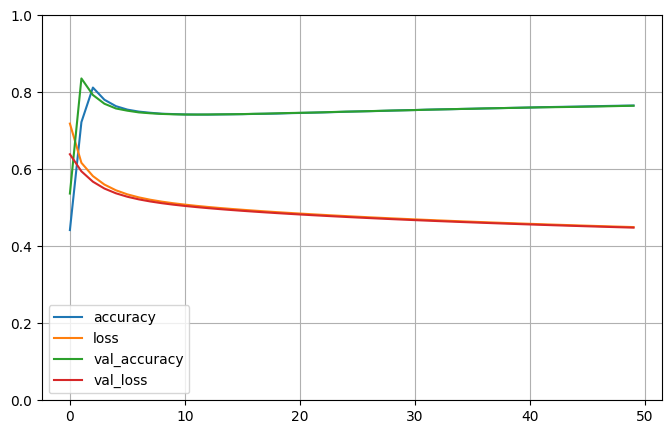

In [13]:
import pandas as pd
import matplotlib.pyplot as plt
pd.DataFrame(history_1.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1) # set the vertical range to [0-1]
plt.show()

In [14]:
#Valutiamo il modello
model_1.evaluate(test_set,label_test)

5469/5469 ━━━━━━━━━━━━━━━━━━━━ 28s 5ms/step - accuracy: 0.7664 - loss: 0.4474


[0.44825106859207153, 0.7653542757034302]

In [15]:
predizioni_1 = model_1.predict(test_set)

5469/5469 ━━━━━━━━━━━━━━━━━━━━ 17s 3ms/step


In [16]:
threshold = 0.5
pred_1 = (predizioni_1> threshold).astype(int)
pred_1

array([[0],
       [0],
       [0],
       ...,
       [1],
       [0],
       [0]])

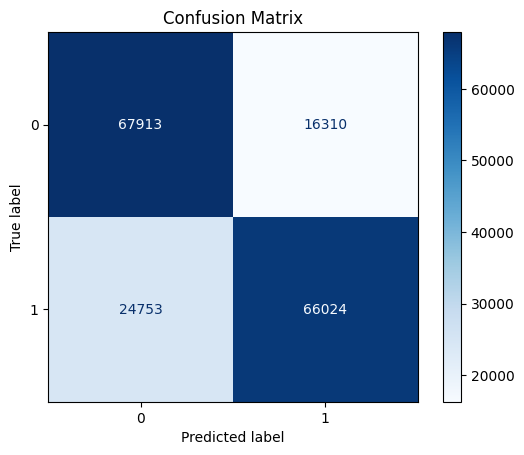

In [17]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(label_test, pred_1)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap=plt.cm.Blues)

plt.title("Confusion Matrix")
plt.show()


In [18]:
TE_0 = cm[1,1]
TS_0 = cm[0,0]
FE_0 = cm[0,1]
FS_0 = cm[1,0]

MODELLO 2

In [19]:
#Creiamo la nostra rete con hidden layer
# Definizione del modello   
input_dim = 4
model_2 = keras.models.Sequential([
 keras.layers.Dense(10, activation="relu",input_shape=(input_dim,)),
 keras.layers.Dense(1, activation="sigmoid")
 ])

c:\Users\aless\miniconda3\envs\neural_network\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [20]:
model_2.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_1 (Dense)                 │ (None, 10)             │            50 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │            11 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 61 (244.00 B)

 Trainable params: 61 (244.00 B)

 Non-trainable params: 0 (0.00 B)

In [21]:
optimizer = SGD(learning_rate=0.08)
model_2.compile(loss="binary_crossentropy",
              optimizer=optimizer,
              metrics=["accuracy"])

In [22]:
history_2 = model_2.fit(training_set, label_traing, epochs=50,batch_size=5000, validation_data=(val_set, label_val))

Epoch 1/50
49/49 ━━━━━━━━━━━━━━━━━━━━ 3s 32ms/step - accuracy: 0.4802 - loss: 0.6903 - val_accuracy: 0.7976 - val_loss: 0.6138
Epoch 2/50
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - accuracy: 0.8061 - loss: 0.6028 - val_accuracy: 0.7726 - val_loss: 0.5705
Epoch 3/50
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - accuracy: 0.7643 - loss: 0.5642 - val_accuracy: 0.7486 - val_loss: 0.5441
Epoch 4/50
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - accuracy: 0.7463 - loss: 0.5401 - val_accuracy: 0.7400 - val_loss: 0.5266
Epoch 5/50
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - accuracy: 0.7381 - loss: 0.5250 - val_accuracy: 0.7395 - val_loss: 0.5136
Epoch 6/50
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - accuracy: 0.7385 - loss: 0.5121 - val_accuracy: 0.7383 - val_loss: 0.5025
Epoch 7/50
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - accuracy: 0.7386 - loss: 0.5018 - val_accuracy: 0.7420 - val_loss: 0.4923
Epoch 8/50
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - accuracy: 0.7403 - loss: 0.4928 - val_accuracy: 0.7457 - v

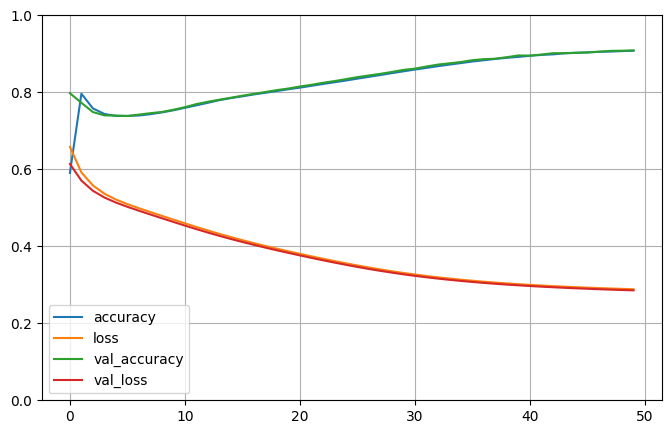

In [23]:
import pandas as pd
import matplotlib.pyplot as plt
pd.DataFrame(history_2.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1) # set the vertical range to [0-1]
plt.show()

In [24]:
#Valutiamo il modello
model_2.evaluate(test_set,label_test)

5469/5469 ━━━━━━━━━━━━━━━━━━━━ 29s 5ms/step - accuracy: 0.9099 - loss: 0.2828


[0.28230416774749756, 0.9101085662841797]

In [25]:
predizioni_2 = model_2.predict(test_set)

5469/5469 ━━━━━━━━━━━━━━━━━━━━ 18s 3ms/step


In [26]:
threshold = 0.5
pred_2 = (predizioni_2> threshold).astype(int)
pred_2

array([[0],
       [0],
       [0],
       ...,
       [1],
       [0],
       [0]])

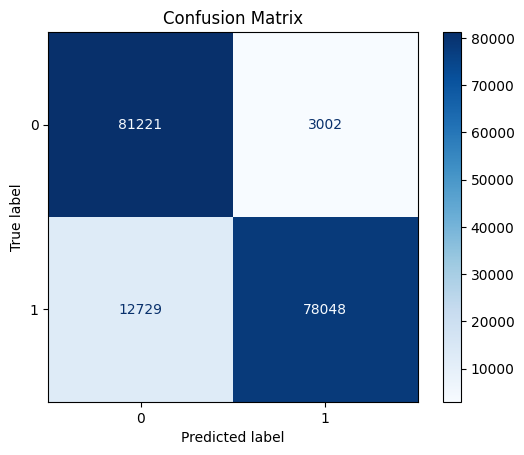

In [27]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(label_test, pred_2)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap=plt.cm.Blues)

plt.title("Confusion Matrix")
plt.show()

In [28]:
TE_10 = cm[1,1]
TS_10 = cm[0,0]
FE_10 = cm[0,1]
FS_10 = cm[1,0]

MODELLO 3

In [29]:
#Creiamo la nostra rete con hidden layer
# Definizione del modello   
input_dim = 4
model_3 = keras.models.Sequential([
 keras.layers.Dense(50, activation="relu",input_shape=(input_dim,)),
 keras.layers.Dense(1, activation="sigmoid")
 ])

c:\Users\aless\miniconda3\envs\neural_network\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [30]:
model_3.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_3 (Dense)                 │ (None, 50)             │           250 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 1)              │            51 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 301 (1.18 KB)

 Trainable params: 301 (1.18 KB)

 Non-trainable params: 0 (0.00 B)

In [31]:
optimizer = SGD(learning_rate=0.08)
model_3.compile(loss="binary_crossentropy",
              optimizer=optimizer,
              metrics=["accuracy"])

In [32]:
history_3 = model_3.fit(training_set, label_traing, epochs=50,batch_size=5000, validation_data=(val_set, label_val))

Epoch 1/50
49/49 ━━━━━━━━━━━━━━━━━━━━ 3s 38ms/step - accuracy: 0.5508 - loss: 0.6642 - val_accuracy: 0.8077 - val_loss: 0.5795
Epoch 2/50
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - accuracy: 0.7919 - loss: 0.5701 - val_accuracy: 0.7670 - val_loss: 0.5420
Epoch 3/50
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - accuracy: 0.7636 - loss: 0.5374 - val_accuracy: 0.7543 - val_loss: 0.5188
Epoch 4/50
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - accuracy: 0.7536 - loss: 0.5161 - val_accuracy: 0.7517 - val_loss: 0.5022
Epoch 5/50
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - accuracy: 0.7513 - loss: 0.5007 - val_accuracy: 0.7537 - val_loss: 0.4889
Epoch 6/50
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - accuracy: 0.7542 - loss: 0.4873 - val_accuracy: 0.7565 - val_loss: 0.4772
Epoch 7/50
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - accuracy: 0.7575 - loss: 0.4769 - val_accuracy: 0.7611 - val_loss: 0.4665
Epoch 8/50
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - accuracy: 0.7631 - loss: 0.4645 - val_accuracy: 0.7663 - v

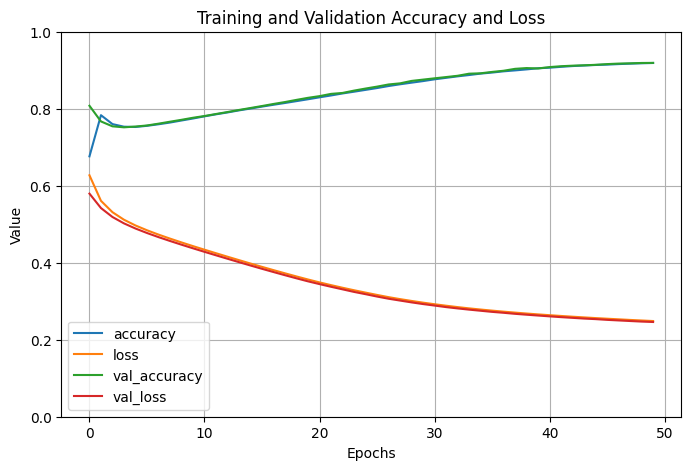

In [33]:
import pandas as pd
import matplotlib.pyplot as plt
pd.DataFrame(history_3.history).plot(figsize=(8, 5))
plt.grid(True)
plt.xlabel('Epochs')
plt.ylabel('Value')
plt.title('Training and Validation Accuracy and Loss')
plt.gca().set_ylim(0, 1) # set the vertical range to [0-1]
plt.show()

In [34]:
#Valutiamo il modello
model_3.evaluate(test_set,label_test)

5469/5469 ━━━━━━━━━━━━━━━━━━━━ 13s 2ms/step - accuracy: 0.9202 - loss: 0.2439


[0.2433997392654419, 0.9202457070350647]

In [35]:
predizioni_3 = model_3.predict(test_set)
predizioni_val = model_3.predict(val_set)

5469/5469 ━━━━━━━━━━━━━━━━━━━━ 9s 2ms/step
3282/3282 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step


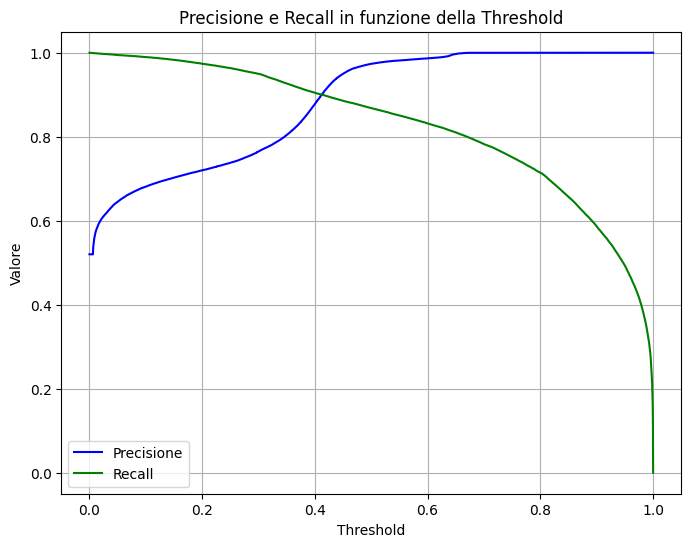

In [36]:
from sklearn.metrics import precision_recall_curve

precision, recall, thresholds = precision_recall_curve(label_val, predizioni_val)



plt.figure(figsize=(8, 6))
plt.plot(thresholds, precision[:-1], label='Precisione', color='blue')
plt.plot(thresholds, recall[:-1], label='Recall', color='green')
plt.xlabel('Threshold')
plt.ylabel('Valore')
plt.title('Precisione e Recall in funzione della Threshold')
plt.legend()
plt.grid(True)
plt.show()

Text(0.5, 1.0, 'ROC Curve')

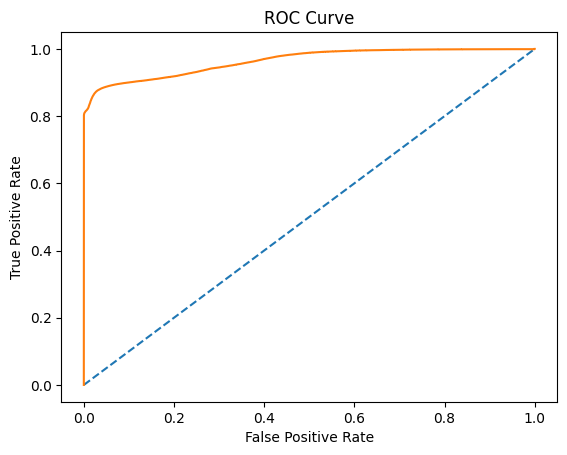

In [37]:
from sklearn.metrics import roc_curve,auc
import matplotlib.pyplot as plt

fpr,tpr,threshold = roc_curve(label_test, predizioni_3)
plt.plot([0,1],[0,1],'--')
plt.plot(fpr,tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')

In [38]:
roc_auc = auc(fpr, tpr)
print('AUC:',roc_auc)

AUC: 0.9639518089463295


In [39]:
threshold = 0.517
pred_3 = (predizioni_3> threshold).astype(int)
pred_3

array([[0],
       [0],
       [0],
       ...,
       [1],
       [0],
       [0]])

In [40]:
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import f1_score
f1 = f1_score(label_test, pred_3)
precision = precision_score(label_test, pred_3) 
recall = recall_score(label_test, pred_3)
print('Precision:',precision)
print('Recall:',recall)
print('f1 score:',f1)

Precision: 0.9769026647896448
Recall: 0.8638201306498342
f1 score: 0.9168878547291371


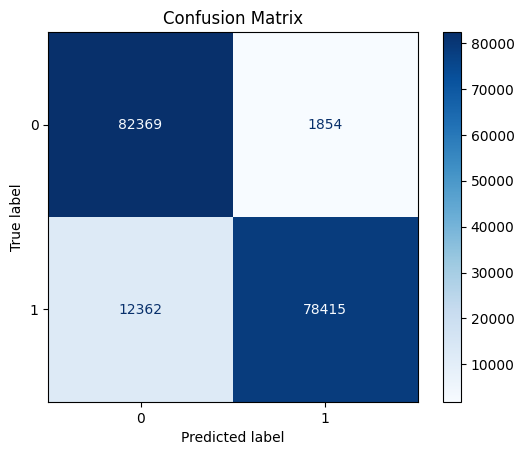

In [41]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(label_test, pred_3)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap=plt.cm.Blues)

plt.title("Confusion Matrix")
plt.show()

In [42]:
TE_50 = cm[1,1]
TS_50 = cm[0,0]
FE_50 = cm[0,1]
FS_50 = cm[1,0]

In [43]:
TE_50_RMSp = 88507
TS_50_RMSp = 83338
FE_50_RMSp = 885
FS_50_RMSp = 2770

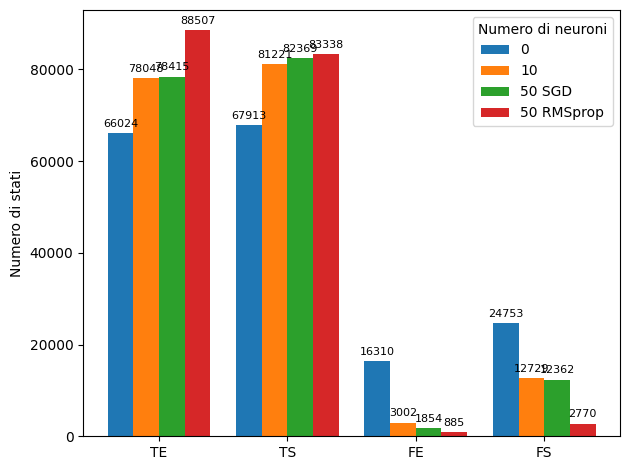

In [46]:
import matplotlib.pyplot as plt
import numpy as np

# Dati
labels = ['TE', 'TS', 'FE', 'FS']
x = np.arange(len(labels))  # [0, 1, 2, 3]

values_0 = [TE_0, TS_0, FE_0, FS_0]
values_10 = [TE_10, TS_10, FE_10, FS_10]
values_50 = [TE_50, TS_50, FE_50, FS_50]
values_50_s = [TE_50_RMSp, TS_50_RMSp, FE_50_RMSp, FS_50_RMSp]  # Nuova colonna

# Larghezza delle barre
width = 0.2  # Ridotta per far spazio alla quarta barra

# Crea il grafico
fig, ax = plt.subplots()
rects1 = ax.bar(x - 1.5 * width, values_0, width, label='0')
rects2 = ax.bar(x - 0.5 * width, values_10, width, label='10')
rects3 = ax.bar(x + 0.5 * width, values_50, width, label='50 SGD')
rects4 = ax.bar(x + 1.5 * width, values_50_s, width, label='50 RMSprop')  # Nuova serie

# Etichette e legenda
ax.set_ylabel('Numero di stati')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend(title="Numero di neuroni")

# Mostra i valori sopra le barre
def autolabel(rects):
    for rect in rects:
        height = rect.get_height()
        ax.annotate(f'{height}',
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),
                    textcoords="offset points",
                    ha='center', va='bottom', fontsize=8)

autolabel(rects1)
autolabel(rects2)
autolabel(rects3)
autolabel(rects4)

plt.tight_layout()
plt.show()